# Notebook contains code for pre-processing the merged dataset, as well as performing EDA and feature engineering

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('merged_df.csv')
df

<ipython-input-2-5042d1fdebbb>:1: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('merged_df.csv')


,url,type,domain_token_count,tld,SymbolCount_Domain,CharacterContinuityRate,NumberofDotsinURL,SymbolCount_URL,NumberRate_AfterPath,domainlength,Entropy_Afterpath,argPathRatio,NumberRate_Extension,ArgUrlRatio,SymbolCount_FileName,Entropy_Extension,delimeter_path
0,http://1337x.to/torrent/1048648/American-Snipe...,NaN,2,to,1,0.024096,1,16,0.0,8,4.638502,0.0,0.0,0.0,0,0.0,4
1,http://1337x.to/torrent/1110018/Blackhat-2015-...,NaN,2,to,1,0.036145,1,17,0.0,8,4.788878,0.0,0.0,0.0,0,0.0,4
2,http://1337x.to/torrent/1122940/Blackhat-2015-...,NaN,2,to,1,0.024096,1,17,0.0,8,4.671231,0.0,0.0,0.0,0,0.0,4
3,http://1337x.to/torrent/1124395/Fast-and-Furio...,NaN,2,to,1,0.024096,1,19,0.0,8,4.748150,0.0,0.0,0.0,0,0.0,4
4,http://1337x.to/torrent/1145504/Avengers-Age-o...,NaN,2,to,1,0.024096,1,17,0.0,8,4.559325,0.0,0.0,0.0,0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688419,xbox360.ign.com/objects/850/850402.html,phishing,0,NaN,0,0.025641,3,6,0.0,0,4.355539,0.0,0.0,0.0,1,2.0,3
688420,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,0,NaN,0,0.022727,2,8,0.0,0,4.243300,0.0,0.0,0.0,0,0.0,4
688421,www.gamespot.com/xbox360/action/deadspace/,phishing,0,NaN,0,0.071429,2,6,0.0,0,4.147921,0.0,0.0,0.0,0,0.0,4
688422,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,0,NaN,0,0.022222,2,9,0.0,0,4.102313,0.0,0.0,0.0,5,0.0,2


## Data Pre-processing:

In [ ]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688424 entries, 0 to 688423
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   url                      688424 non-null  object 
 1   type                     653046 non-null  object 
 2   domain_token_count       688424 non-null  int64  
 3   tld                      225220 non-null  object 
 4   SymbolCount_Domain       688424 non-null  int64  
 5   CharacterContinuityRate  688424 non-null  float64
 6   NumberofDotsinURL        688424 non-null  int64  
 7   SymbolCount_URL          688424 non-null  int64  
 8   NumberRate_AfterPath     688424 non-null  float64
 9   domainlength             688424 non-null  int64  
 10  Entropy_Afterpath        688424 non-null  float64
 11  argPathRatio             688424 non-null  float64
 12  NumberRate_Extension     688424 non-null  float64
 13  ArgUrlRatio              688424 non-null  fl

In [ ]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
url                             0
type                        35378
domain_token_count              0
tld                        463204
SymbolCount_Domain              0
CharacterContinuityRate         0
NumberofDotsinURL               0
SymbolCount_URL                 0
NumberRate_AfterPath            0
domainlength                    0
Entropy_Afterpath               0
argPathRatio                    0
NumberRate_Extension            0
ArgUrlRatio                     0
SymbolCount_FileName            0
Entropy_Extension               0
delimeter_path                  0
dtype: int64


In [ ]:
print("\nRows per class in 'type':")
print(df['type'].value_counts())


Rows per class in 'type':
type
benign        428080
defacement     95308
phishing       94092
malware        23645
spam           11921
Name: count, dtype: int64


In [ ]:
df.drop(columns=['tld'], inplace=True)
df.dropna(subset=['type'], inplace=True)

In [ ]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
url                        0
type                       0
domain_token_count         0
SymbolCount_Domain         0
CharacterContinuityRate    0
NumberofDotsinURL          0
SymbolCount_URL            0
NumberRate_AfterPath       0
domainlength               0
Entropy_Afterpath          0
argPathRatio               0
NumberRate_Extension       0
ArgUrlRatio                0
SymbolCount_FileName       0
Entropy_Extension          0
delimeter_path             0
dtype: int64


In [ ]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


df.drop_duplicates(inplace=True)

Number of duplicate rows: 0


In [ ]:
feature_cols = df.columns[df.columns != 'type']
df = df.loc[~(df[feature_cols] == 0).all(axis=1)]

print(f"Remaining rows after removing all-zero rows: {df.shape[0]}")

Remaining rows after removing all-zero rows: 653046


In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns

scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("\nNumeric columns after scaling:")
df[numeric_cols].head()


Numeric columns after scaling:


,domain_token_count,SymbolCount_Domain,CharacterContinuityRate,NumberofDotsinURL,SymbolCount_URL,NumberRate_AfterPath,domainlength,Entropy_Afterpath,argPathRatio,NumberRate_Extension,ArgUrlRatio,SymbolCount_FileName,Entropy_Extension,delimeter_path
35378,0.093023,0.069767,0.068911,0.095238,0.021505,0.0,0.105932,0.470801,0.0,0.0,0.0,0.004975,0.308309,0.025641
35379,0.093023,0.069767,0.050851,0.119048,0.026882,0.0,0.105932,0.531055,0.0,1.0,0.0,0.004975,0.000000,0.051282
35380,0.093023,0.069767,0.044576,0.095238,0.026882,0.0,0.105932,0.522131,0.0,0.0,0.0,0.000000,0.000000,0.076923
35381,0.093023,0.069767,0.045276,0.095238,0.026882,0.0,0.105932,0.516925,0.0,0.0,0.0,0.000000,0.000000,0.076923
35382,0.093023,0.069767,0.026628,0.095238,0.045699,0.0,0.105932,0.558121,0.0,0.0,0.0,0.034826,0.000000,0.076923


In [ ]:
encoder = LabelEncoder()
df['type'] = encoder.fit_transform(df['type'])

# Mapping for reference (0 -> benign, 1 -> defacement, 2 -> malware, 3 -> phishing, 4 -> spam)
print("Label encoding mapping:", dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))

Label encoding mapping: {'benign': np.int64(0), 'defacement': np.int64(1), 'malware': np.int64(2), 'phishing': np.int64(3), 'spam': np.int64(4)}


In [ ]:
df

,type,domain_token_count,SymbolCount_Domain,CharacterContinuityRate,NumberofDotsinURL,SymbolCount_URL,NumberRate_AfterPath,domainlength,Entropy_Afterpath,argPathRatio,NumberRate_Extension,ArgUrlRatio,SymbolCount_FileName,Entropy_Extension,delimeter_path
0,3,0.000000,0.000000,0.061637,0.047619,0.008065,0.500000,0.000000,0.524080,0.000000,0.500000,0.000000,0.019802,0.267129,0.000000
1,0,0.000000,0.000000,0.056275,0.047619,0.013441,0.500000,0.000000,0.608429,0.000000,0.500000,0.000000,0.014851,0.400694,0.031250
2,0,0.000000,0.000000,0.031367,0.047619,0.013441,0.500000,0.000000,0.563981,0.000000,0.500000,0.000000,0.009901,0.345260,0.046875
3,1,0.093023,0.069767,0.033202,0.071429,0.048387,0.571429,0.088983,0.493764,0.006148,0.500000,0.567867,0.009901,0.256217,0.015625
4,1,0.069767,0.046512,0.007598,0.047619,0.037634,0.556701,0.097458,0.493764,0.024341,0.500000,0.841913,0.009901,0.256217,0.015625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665658,4,0.093023,0.069767,0.499540,0.119048,0.061828,0.000000,0.076271,0.000000,0.000019,0.583333,0.013075,0.084158,0.221724,0.031250
665660,4,0.069767,0.046512,0.666360,0.071429,0.021505,0.581038,0.063559,0.187589,0.001236,0.580611,0.982380,0.019802,0.209263,0.015625
665665,4,0.093023,0.069767,0.499540,0.119048,0.051075,0.533333,0.110169,0.215167,0.000944,0.813953,0.593745,0.019802,0.221275,0.031250
665667,4,0.069767,0.046512,0.772518,0.166667,0.069892,0.514706,0.093220,0.204271,0.001052,0.709016,0.754518,0.044554,0.229356,0.140625


## Balancing dataset:

<ipython-input-12-e0f165234515>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette="pastel")


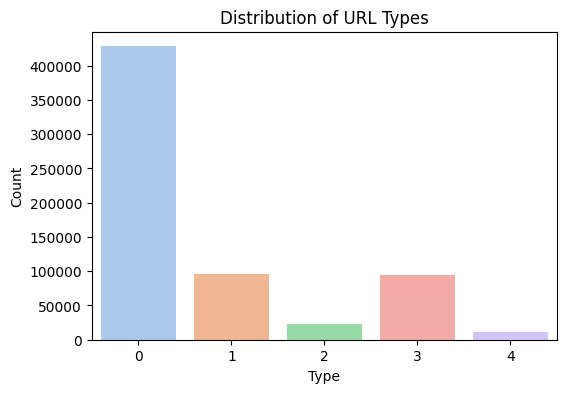

Class Distribution:
type
0    428080
1     95308
3     94092
2     23645
4     11921
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='type', data=df, palette="pastel")
plt.title("Distribution of URL Types")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

print("Class Distribution:")
print(df['type'].value_counts())

In [ ]:
X = df.drop(columns=['type'])
y = df['type']

class_counts = y.value_counts()
max_count = class_counts.max()

df_resampled = df.copy()

In [ ]:
for class_label, count in class_counts.items():
    if count < max_count:
        samples_needed = max_count - count

        class_samples = df[df['type'] == class_label].drop(columns=['type'])
        avg_sample = class_samples.mean()

        new_samples = pd.DataFrame([avg_sample] * samples_needed, columns=class_samples.columns)
        new_samples['type'] = class_label

        df_resampled = pd.concat([df_resampled, new_samples], ignore_index=True)

df_resampled = df_resampled.sample(frac=1, random_state=42).reset_index(drop=True)

print("Class distribution after balancing:")
print(df_resampled['type'].value_counts())

In [ ]:
df = df_resampled
df

,domain_token_count,SymbolCount_Domain,CharacterContinuityRate,NumberofDotsinURL,SymbolCount_URL,NumberRate_AfterPath,domainlength,Entropy_Afterpath,argPathRatio,NumberRate_Extension,ArgUrlRatio,SymbolCount_FileName,Entropy_Extension,delimeter_path,type
0,0.000000,0.000000,0.061637,0.047619,0.008065,0.500000,0.000000,0.524080,0.000000,0.500000,0.000000,0.019802,0.267129,0.000000,3
1,0.000000,0.000000,0.056275,0.047619,0.013441,0.500000,0.000000,0.608429,0.000000,0.500000,0.000000,0.014851,0.400694,0.031250,0
2,0.000000,0.000000,0.031367,0.047619,0.013441,0.500000,0.000000,0.563981,0.000000,0.500000,0.000000,0.009901,0.345260,0.046875,0
3,0.093023,0.069767,0.033202,0.071429,0.048387,0.571429,0.088983,0.493764,0.006148,0.500000,0.567867,0.009901,0.256217,0.015625,1
4,0.069767,0.046512,0.007598,0.047619,0.037634,0.556701,0.097458,0.493764,0.024341,0.500000,0.841913,0.009901,0.256217,0.015625,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581675,0.069767,0.046512,0.666360,0.071429,0.050020,0.551050,0.063559,0.206999,0.000910,0.548761,0.622790,0.072314,0.230556,0.031250,4
1581676,0.093023,0.069767,0.499540,0.119048,0.056452,0.000000,0.076271,0.000000,0.000023,0.586012,0.015071,0.074257,0.223768,0.031250,4
1581677,0.088885,0.065630,0.650195,0.091002,0.041098,0.546522,0.090672,0.209002,0.000889,0.543397,0.531851,0.051813,0.233972,0.039590,4
1581678,0.100625,0.077369,0.428045,0.103021,0.024194,0.000000,0.069017,0.000000,0.000062,0.500000,0.031422,0.009901,0.267129,0.062500,4


## EDA & Plots:

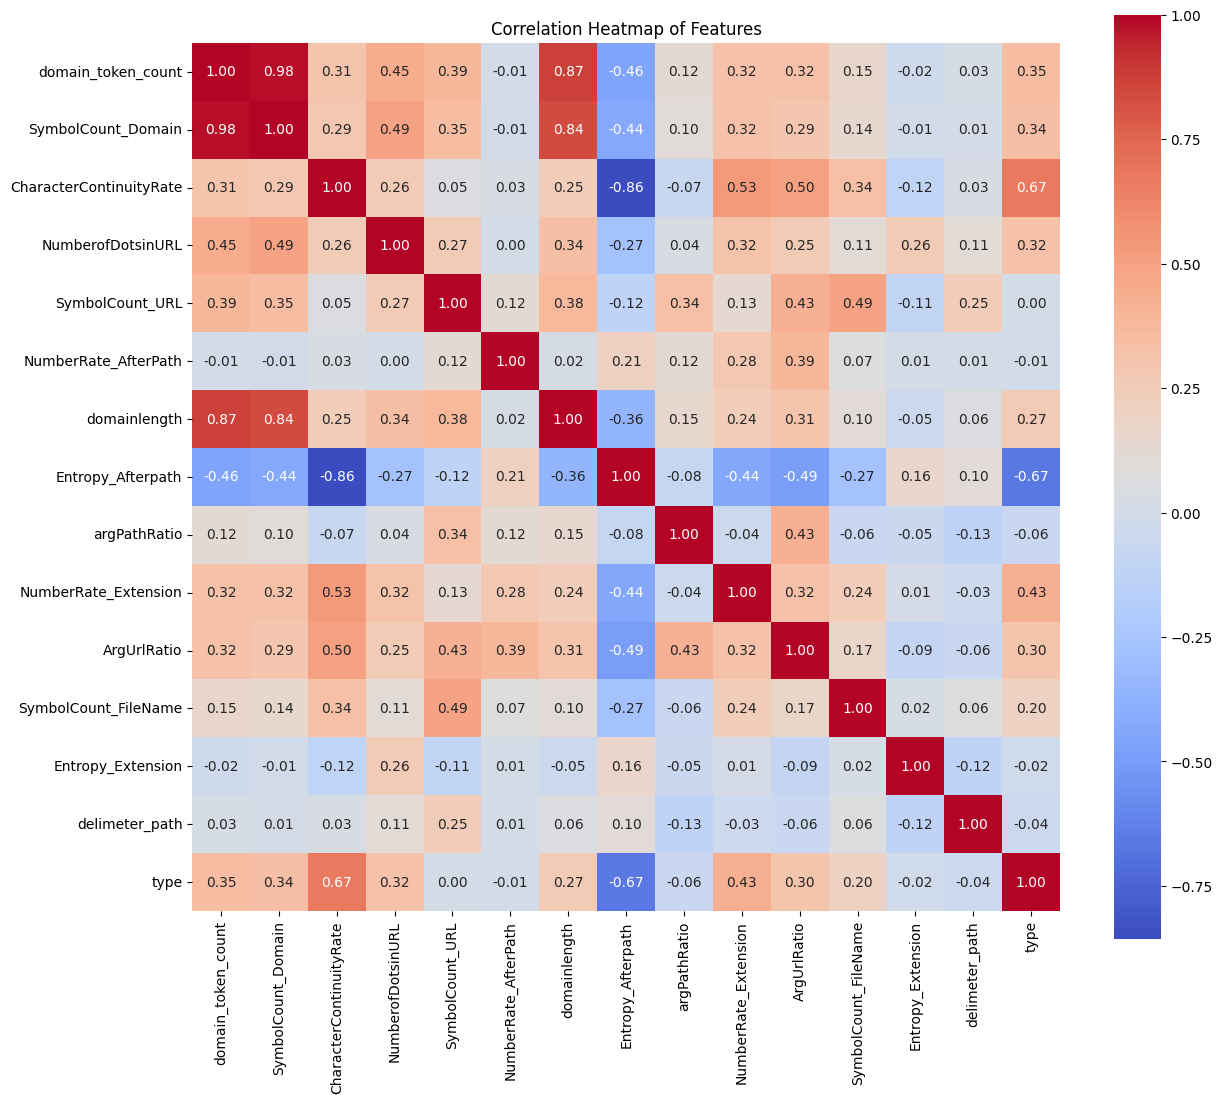

In [ ]:
corr_matrix = df.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of Features")
plt.show()

In [ ]:
if df['type'].dtype.name in ['int64', 'float64']:
    target_corr = corr_matrix['type'].drop('type')
    print("Correlation of features with target:\n", target_corr.sort_values(ascending=False))
else:
    print("The 'type' column is non-numeric; consider encoding it to compute correlations.")

Correlation of features with target:
 CharacterContinuityRate    0.671276
NumberRate_Extension       0.428085
domain_token_count         0.350780
SymbolCount_Domain         0.342105
NumberofDotsinURL          0.319318
ArgUrlRatio                0.303049
domainlength               0.267215
SymbolCount_FileName       0.196556
SymbolCount_URL            0.003105
NumberRate_AfterPath      -0.006794
Entropy_Extension         -0.020445
delimeter_path            -0.044406
argPathRatio              -0.060980
Entropy_Afterpath         -0.666505
Name: type, dtype: float64


In [ ]:
print("Descriptive Statistics:")
print(df.describe())

Descriptive Statistics:
       domain_token_count  SymbolCount_Domain  CharacterContinuityRate  \
count        1.581680e+06        1.581680e+06             1.581680e+06   
mean         4.858518e-02        3.329262e-02             1.496145e-01   
std          3.941145e-02        3.014115e-02             2.204779e-01   
min          0.000000e+00        0.000000e+00             0.000000e+00   
25%          0.000000e+00        0.000000e+00             2.767734e-02   
50%          6.976744e-02        4.651163e-02             4.674249e-02   
75%          6.976744e-02        4.651163e-02             9.007238e-02   
max          1.000000e+00        1.000000e+00             1.000000e+00   

       NumberofDotsinURL  SymbolCount_URL  NumberRate_AfterPath  domainlength  \
count       1.581680e+06     1.581680e+06          1.581680e+06  1.581680e+06   
mean        6.657952e-02     3.020152e-02          5.120155e-01  4.872061e-02   
std         3.308718e-02     2.019807e-02          1.213614e-01  4

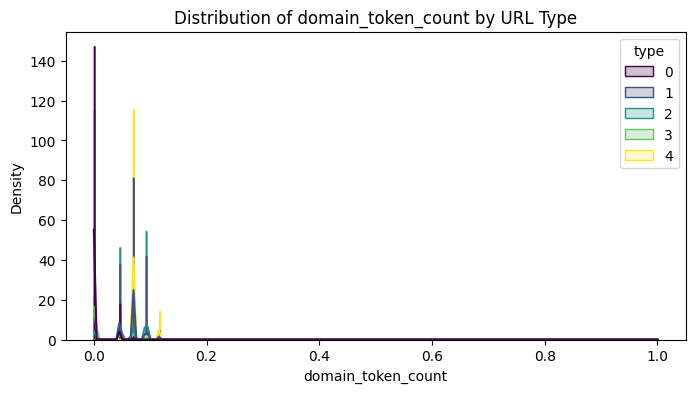

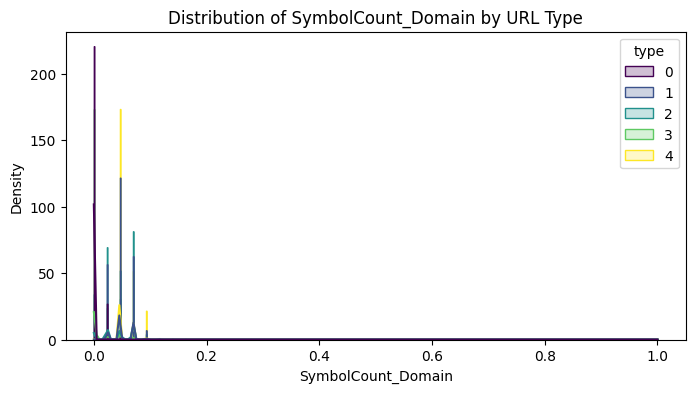

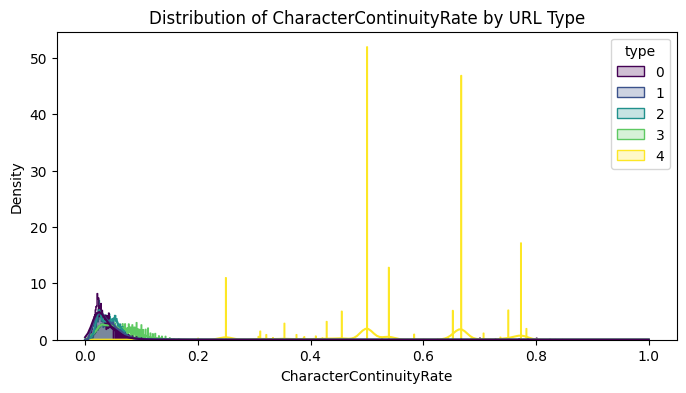

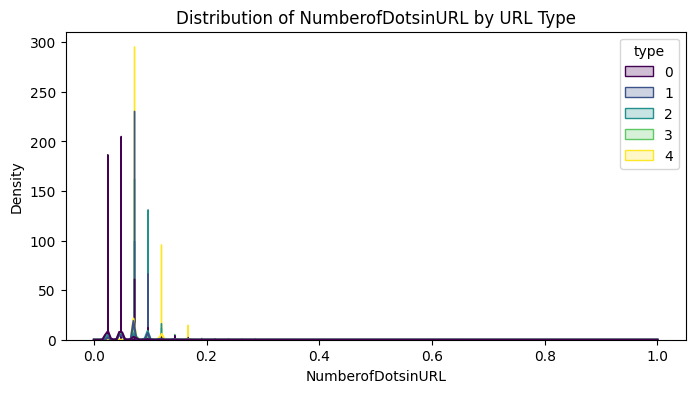

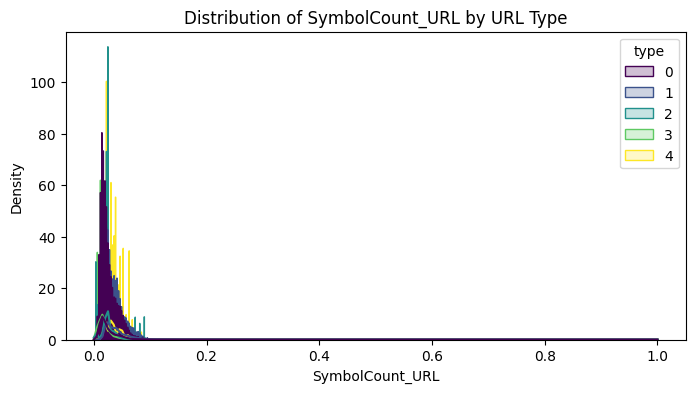

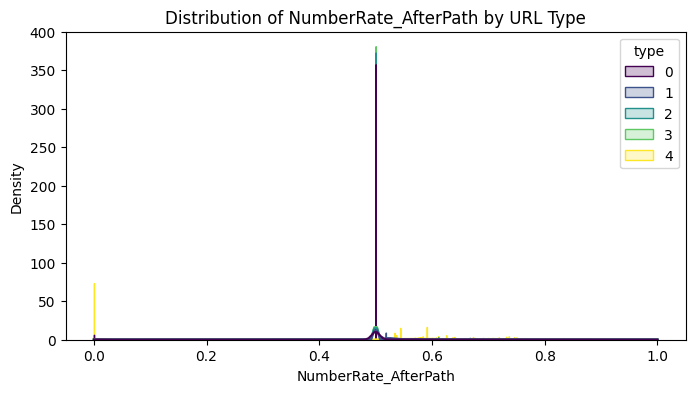

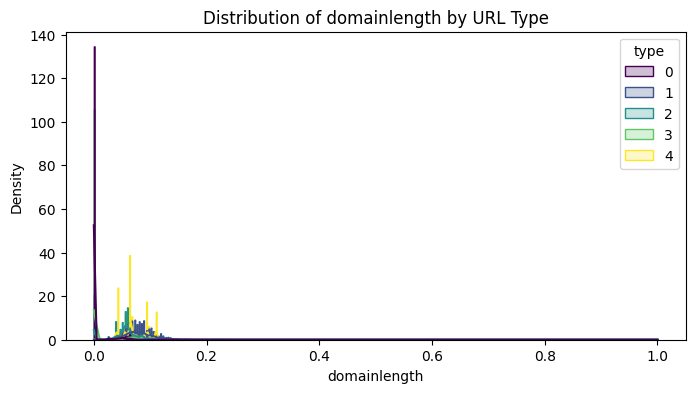

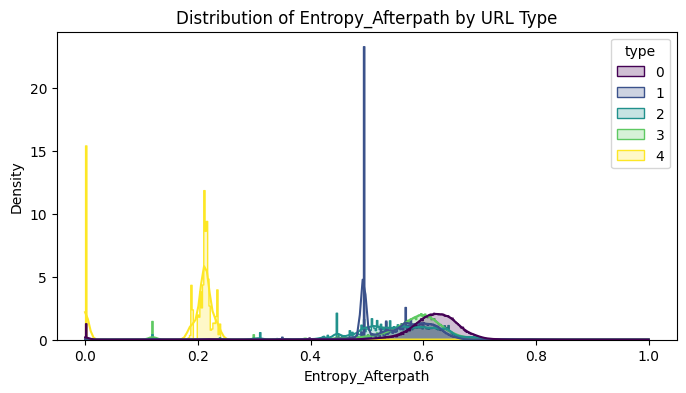

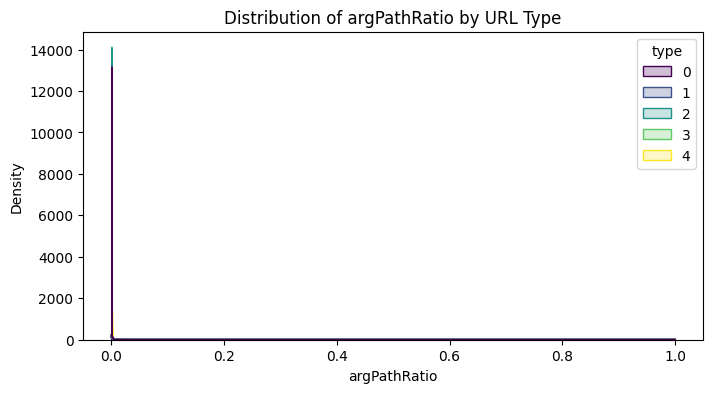

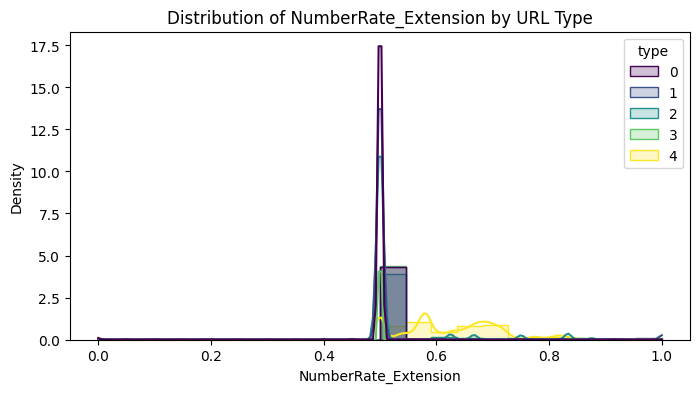

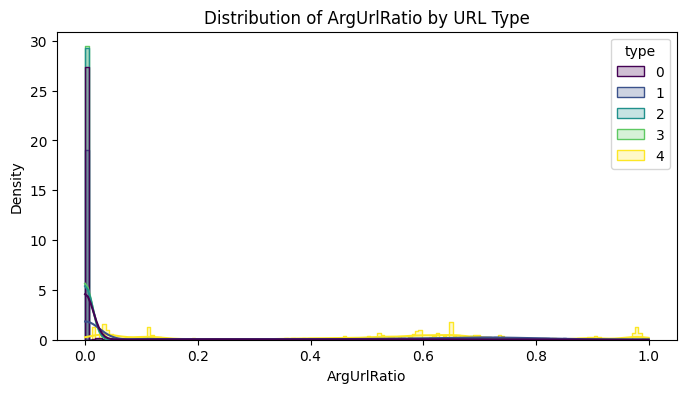

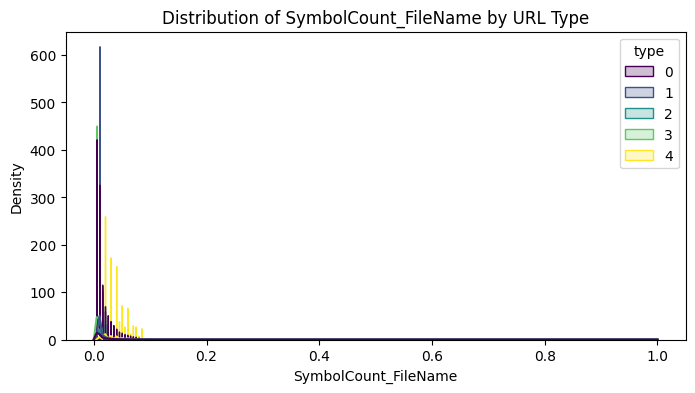

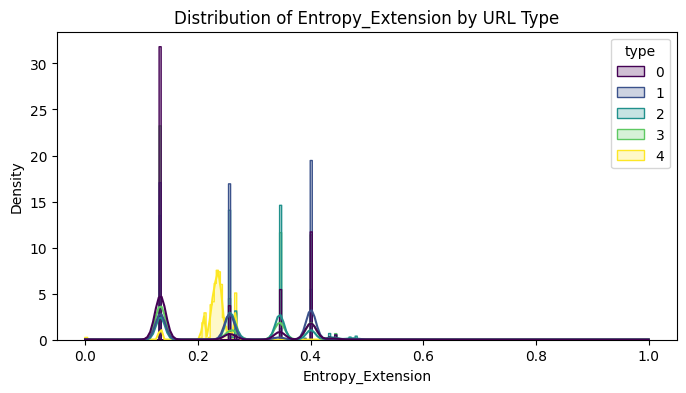

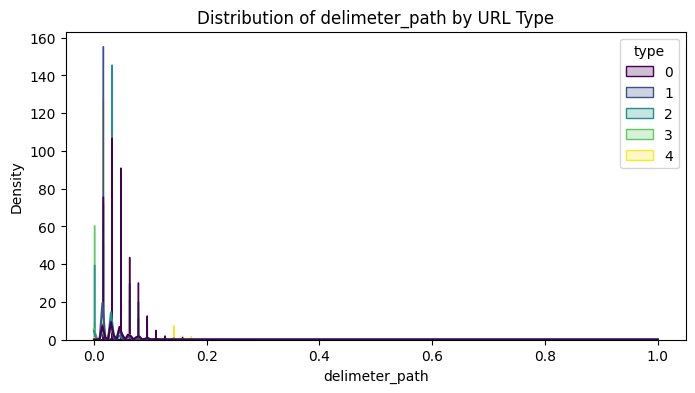

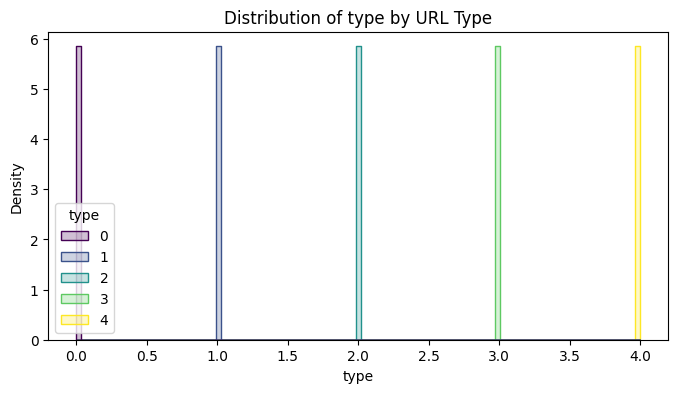

In [ ]:
features = [col for col in df.columns if col != 'type']

selected_features = df.columns

for feature in selected_features:
    plt.figure(figsize=(8,4))
    sns.histplot(data=df, x=feature, hue="type", kde=True, palette="viridis", element="step", stat="density")
    plt.title(f"Distribution of {feature} by URL Type")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.show()


<ipython-input-32-889fcc75dadf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y=feature, data=df, palette="Set2")


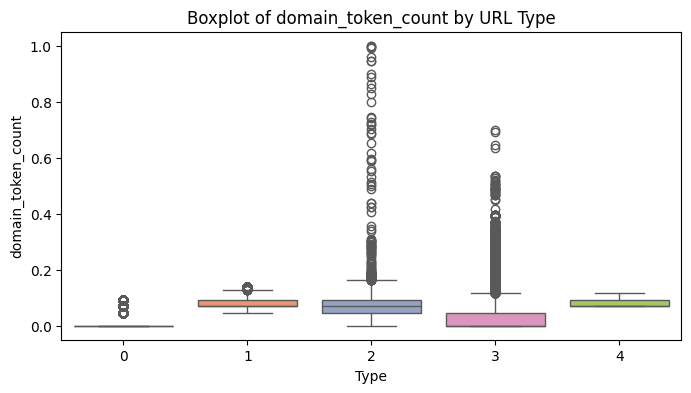

<ipython-input-32-889fcc75dadf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y=feature, data=df, palette="Set2")


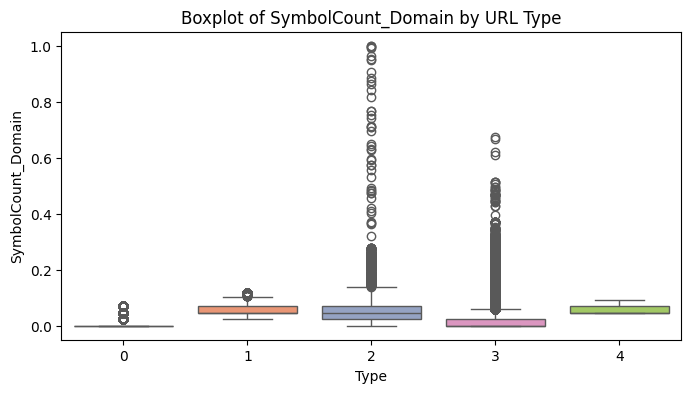

<ipython-input-32-889fcc75dadf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y=feature, data=df, palette="Set2")


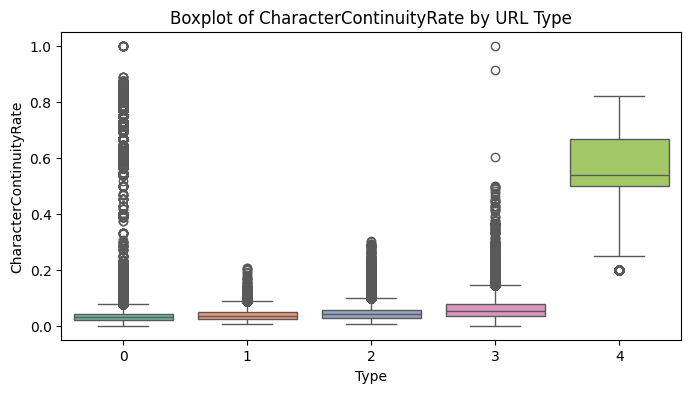

<ipython-input-32-889fcc75dadf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y=feature, data=df, palette="Set2")


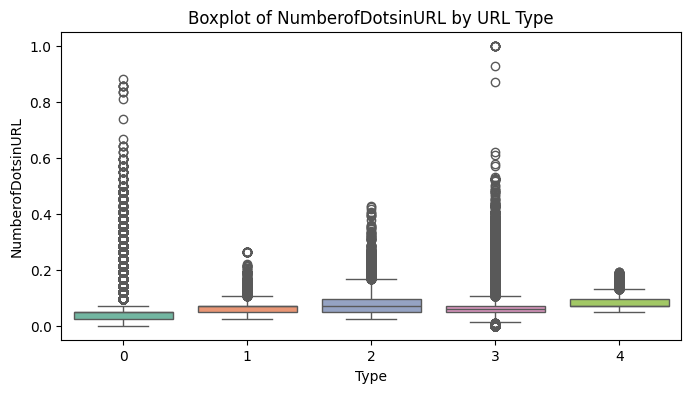

<ipython-input-32-889fcc75dadf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y=feature, data=df, palette="Set2")


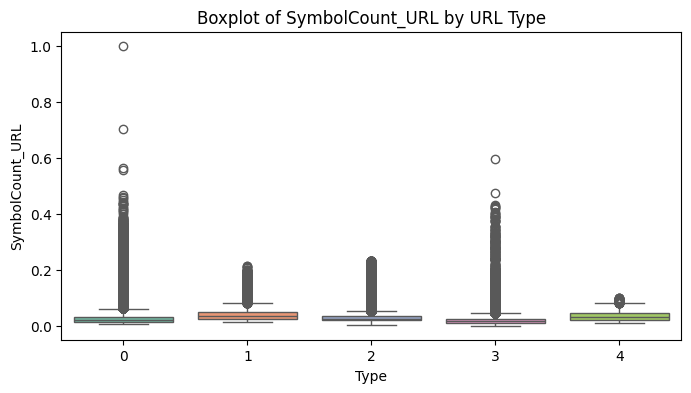

<ipython-input-32-889fcc75dadf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y=feature, data=df, palette="Set2")


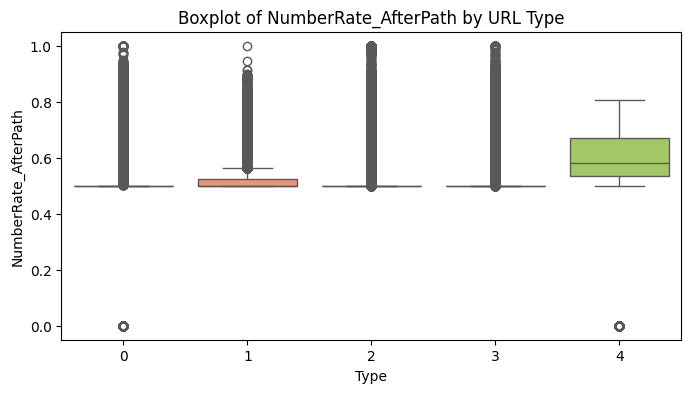

<ipython-input-32-889fcc75dadf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y=feature, data=df, palette="Set2")


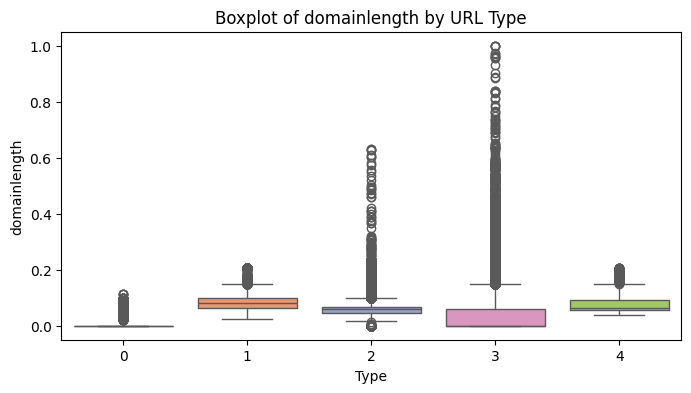

<ipython-input-32-889fcc75dadf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y=feature, data=df, palette="Set2")


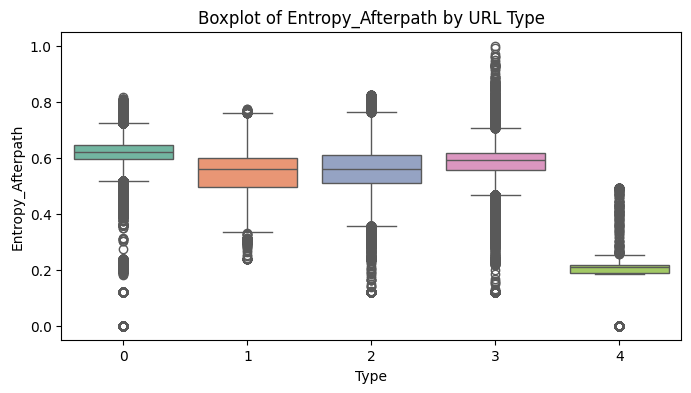

<ipython-input-32-889fcc75dadf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y=feature, data=df, palette="Set2")


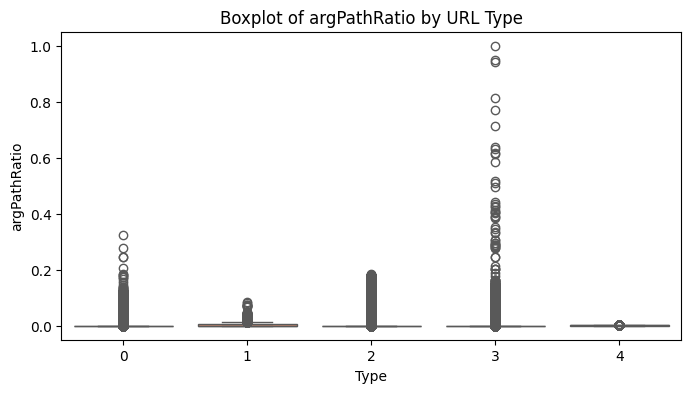

<ipython-input-32-889fcc75dadf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y=feature, data=df, palette="Set2")


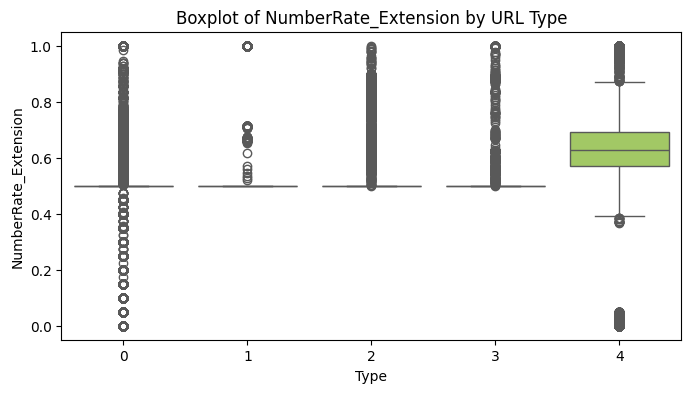

<ipython-input-32-889fcc75dadf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y=feature, data=df, palette="Set2")


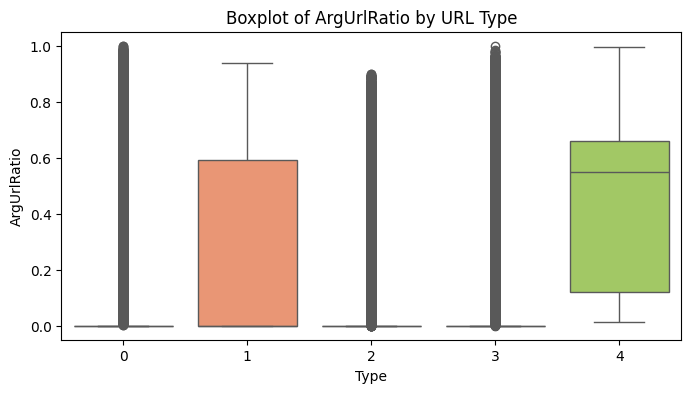

<ipython-input-32-889fcc75dadf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y=feature, data=df, palette="Set2")


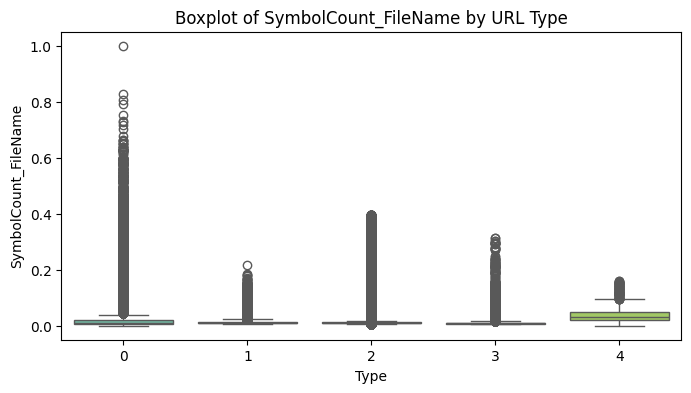

<ipython-input-32-889fcc75dadf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y=feature, data=df, palette="Set2")


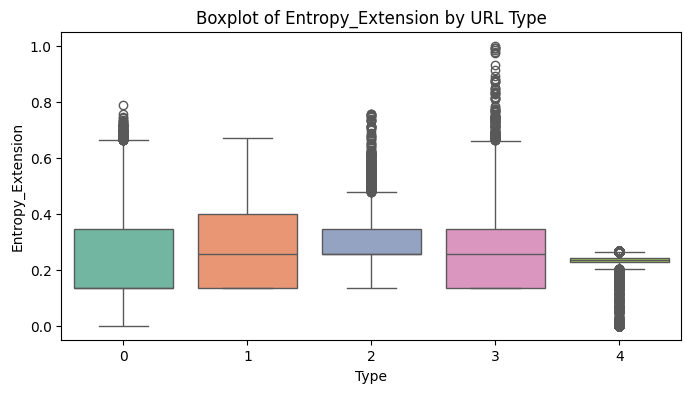

<ipython-input-32-889fcc75dadf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y=feature, data=df, palette="Set2")


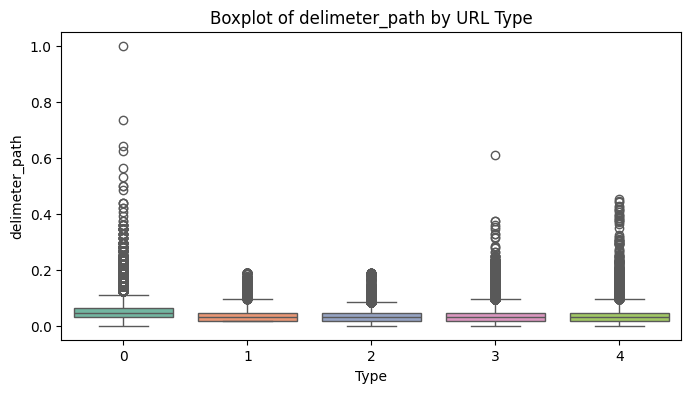

<ipython-input-32-889fcc75dadf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y=feature, data=df, palette="Set2")


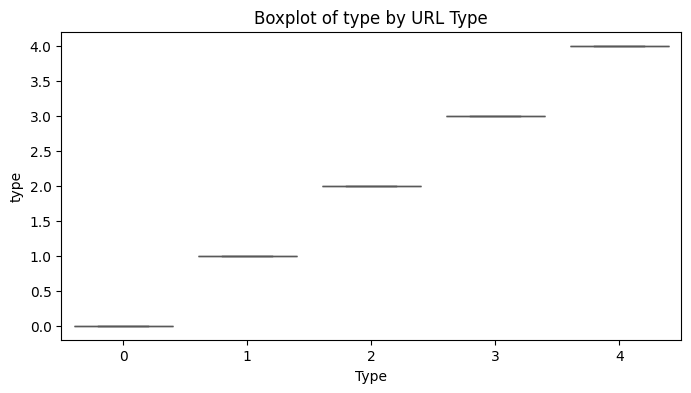

In [ ]:
for feature in selected_features:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='type', y=feature, data=df, palette="Set2")
    plt.title(f"Boxplot of {feature} by URL Type")
    plt.xlabel("Type")
    plt.ylabel(feature)
    plt.show()

<ipython-input-33-e0cd5b834bb3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='type', y=feature, data=df, palette="Pastel1", inner="quartile")


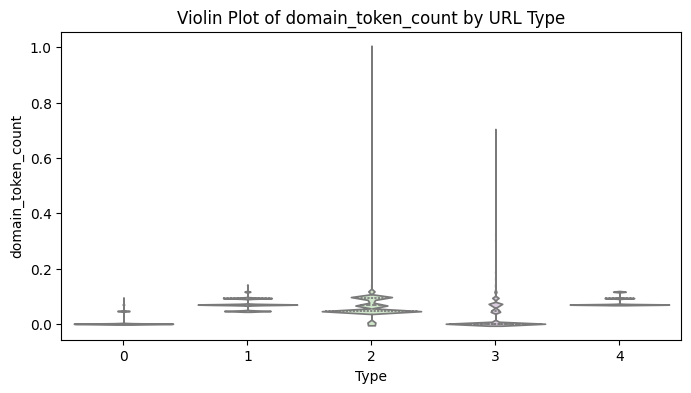

<ipython-input-33-e0cd5b834bb3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='type', y=feature, data=df, palette="Pastel1", inner="quartile")


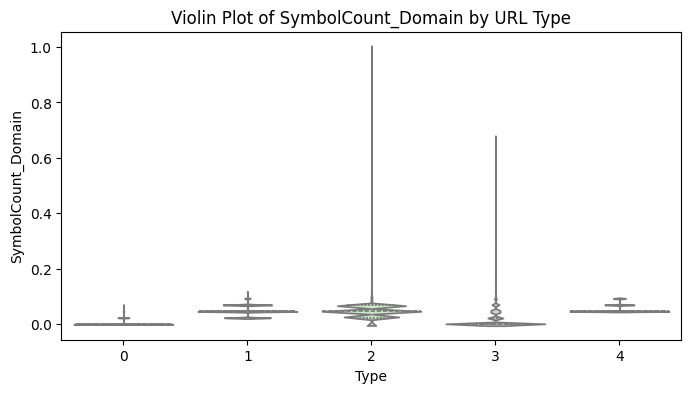

<ipython-input-33-e0cd5b834bb3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='type', y=feature, data=df, palette="Pastel1", inner="quartile")


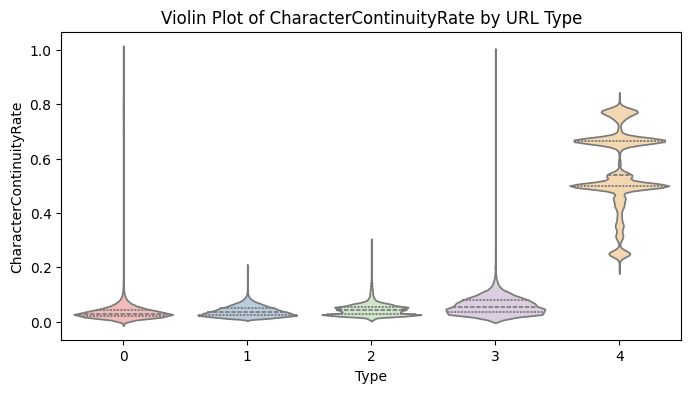

<ipython-input-33-e0cd5b834bb3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='type', y=feature, data=df, palette="Pastel1", inner="quartile")


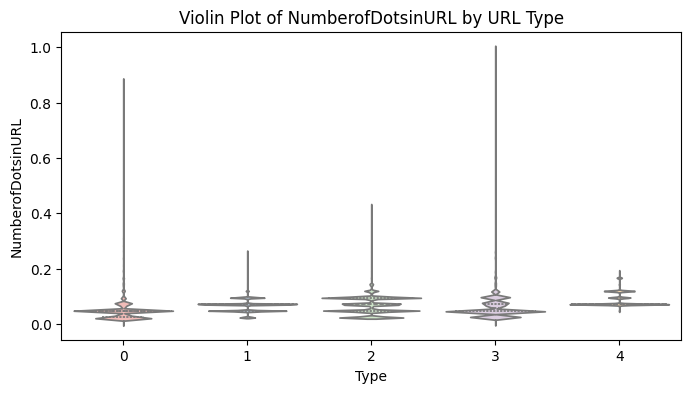

<ipython-input-33-e0cd5b834bb3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='type', y=feature, data=df, palette="Pastel1", inner="quartile")


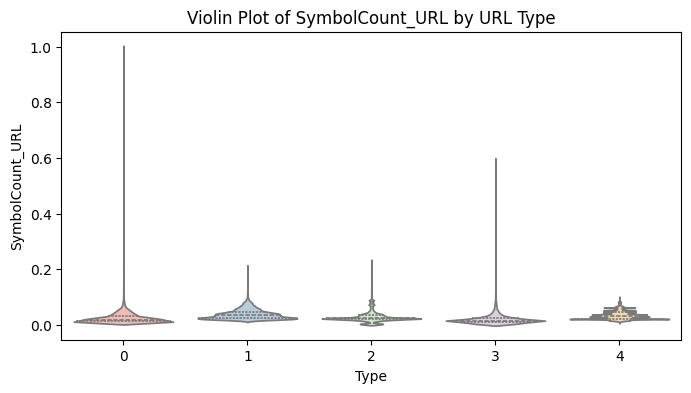

<ipython-input-33-e0cd5b834bb3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='type', y=feature, data=df, palette="Pastel1", inner="quartile")


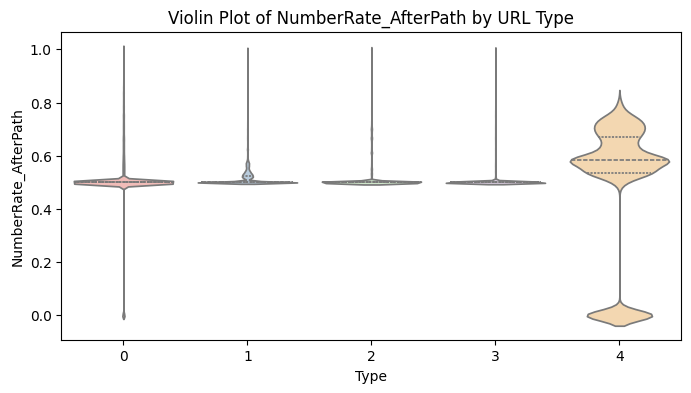

<ipython-input-33-e0cd5b834bb3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='type', y=feature, data=df, palette="Pastel1", inner="quartile")


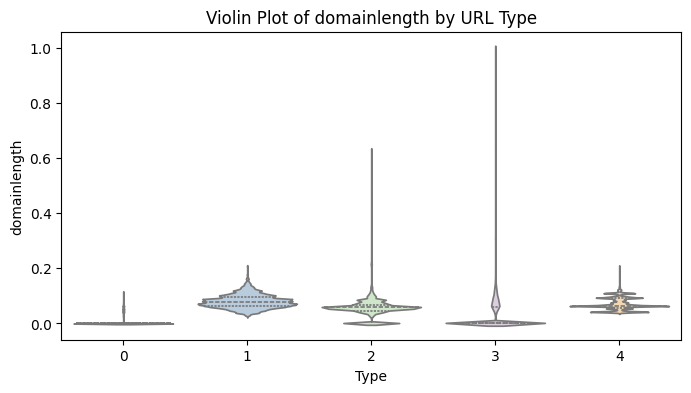

<ipython-input-33-e0cd5b834bb3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='type', y=feature, data=df, palette="Pastel1", inner="quartile")


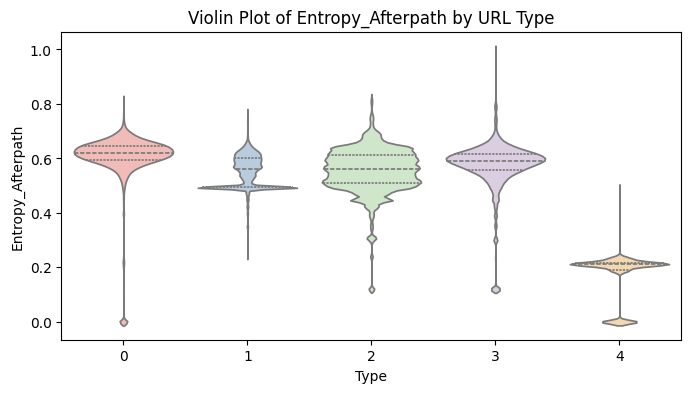

<ipython-input-33-e0cd5b834bb3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='type', y=feature, data=df, palette="Pastel1", inner="quartile")


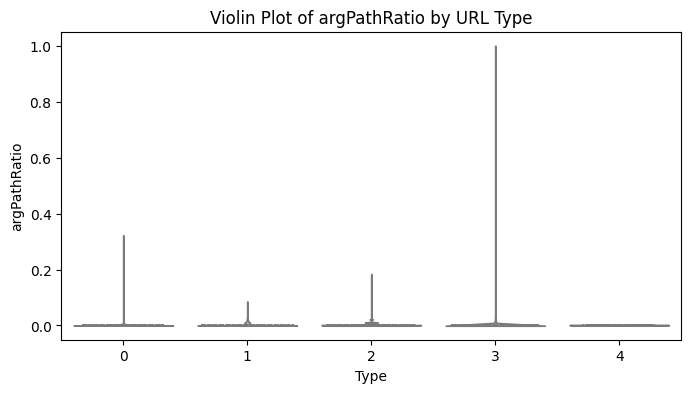

<ipython-input-33-e0cd5b834bb3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='type', y=feature, data=df, palette="Pastel1", inner="quartile")


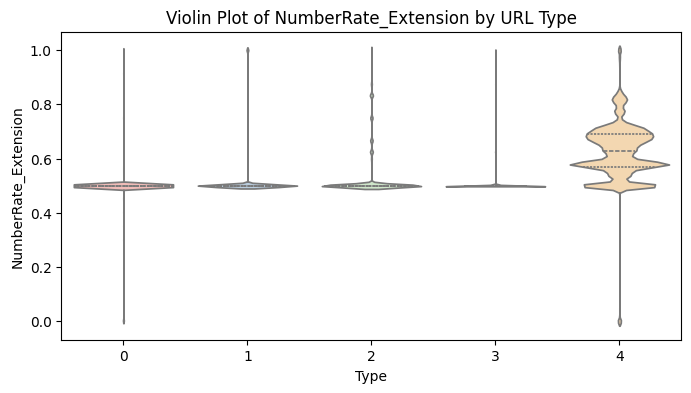

<ipython-input-33-e0cd5b834bb3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='type', y=feature, data=df, palette="Pastel1", inner="quartile")


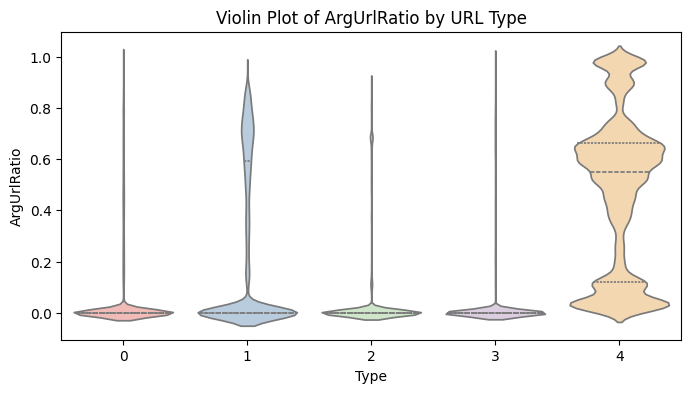

<ipython-input-33-e0cd5b834bb3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='type', y=feature, data=df, palette="Pastel1", inner="quartile")


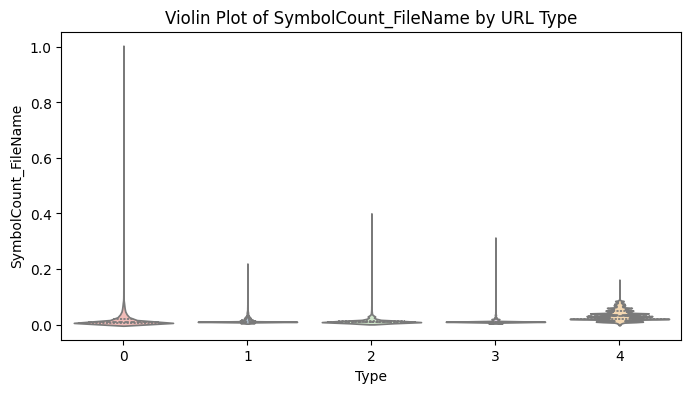

<ipython-input-33-e0cd5b834bb3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='type', y=feature, data=df, palette="Pastel1", inner="quartile")


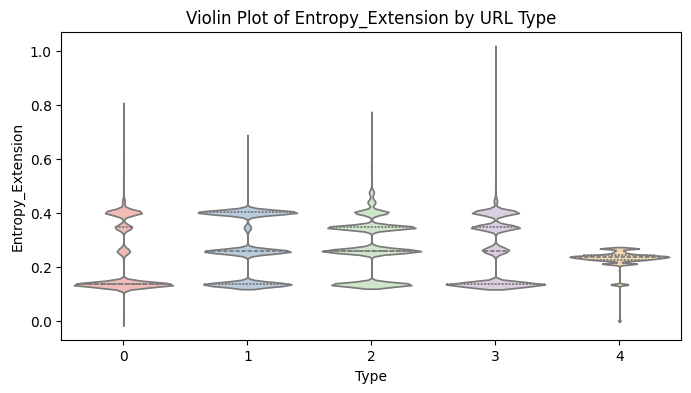

<ipython-input-33-e0cd5b834bb3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='type', y=feature, data=df, palette="Pastel1", inner="quartile")


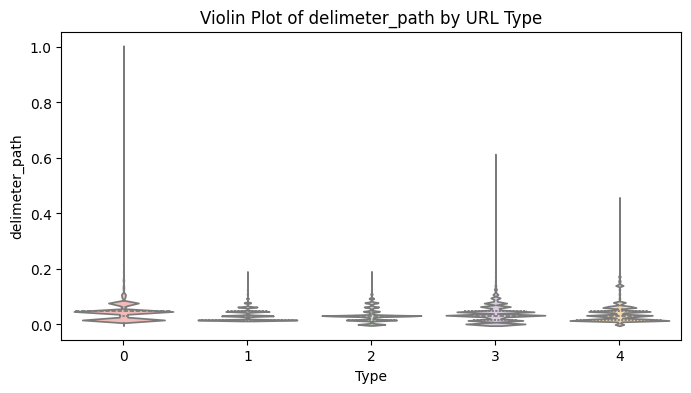

<ipython-input-33-e0cd5b834bb3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='type', y=feature, data=df, palette="Pastel1", inner="quartile")


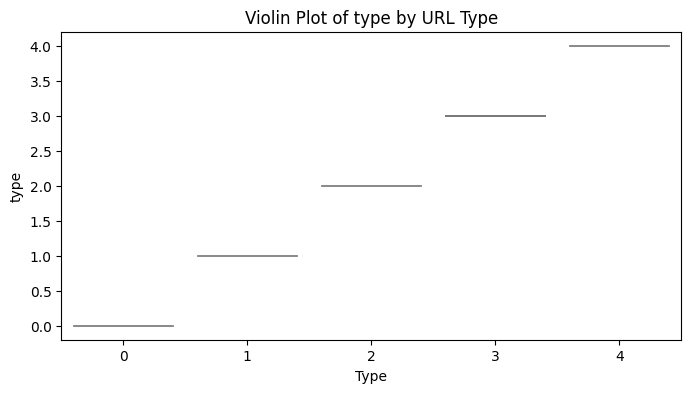

In [ ]:
for feature in selected_features:
    plt.figure(figsize=(8, 4))
    sns.violinplot(x='type', y=feature, data=df, palette="Pastel1", inner="quartile")
    plt.title(f"Violin Plot of {feature} by URL Type")
    plt.xlabel("Type")
    plt.ylabel(feature)
    plt.show()

## Feature Engineering

In [ ]:
df['Domain_Symbol_Density'] = df.apply(lambda row: row['SymbolCount_Domain'] / row['domainlength'] if row['domainlength'] > 0 else 0, axis=1)
df['URL_Symbol_Density'] = df.apply(lambda row: row['SymbolCount_URL'] / (row['domainlength'] + row['delimeter_path']) if (row['domainlength'] + row['delimeter_path']) > 0 else 0, axis=1)

In [ ]:
df['Combined_Entropy'] = (df['Entropy_Afterpath'] + df['Entropy_Extension']) / 2
df['Dot_Ratio'] = df.apply(lambda row: row['NumberofDotsinURL'] / row['domain_token_count'] if row['domain_token_count'] > 0 else 0, axis=1)

In [ ]:
df['Number_Rate_Ratio'] = df['NumberRate_AfterPath'] / (df['NumberRate_Extension'] + 1e-5)
df['Overall_Complexity'] = (df['CharacterContinuityRate'] + df['argPathRatio'] + df['ArgUrlRatio']) / 3

In [ ]:
df['Total_Symbol_Count'] = df['SymbolCount_Domain'] + df['SymbolCount_URL'] + df['SymbolCount_FileName']
df['Path_to_URL_Ratio'] = df['argPathRatio'] / (df['ArgUrlRatio'] + 1e-5)

In [ ]:
new_features = ['Domain_Symbol_Density', 'URL_Symbol_Density', 'Combined_Entropy', 'Dot_Ratio',
                'Number_Rate_Ratio', 'Overall_Complexity', 'Total_Symbol_Count', 'Path_to_URL_Ratio']


print("Newly created features:")
df[new_features].head()

Newly created features:


,Domain_Symbol_Density,URL_Symbol_Density,Combined_Entropy,Dot_Ratio,Number_Rate_Ratio,Overall_Complexity,Total_Symbol_Count,Path_to_URL_Ratio
0,0.000000,0.000000,0.395605,0.000000,0.999980,0.020546,0.027866,0.000000
1,0.000000,0.430108,0.504561,0.000000,0.999980,0.018758,0.028292,0.000000
2,0.000000,0.286738,0.454620,0.000000,0.999980,0.010456,0.023342,0.000000
3,0.784053,0.462556,0.374990,0.767857,1.142834,0.202406,0.128056,0.010826
4,0.477250,0.332805,0.374990,0.682540,1.113380,0.291284,0.094047,0.028912


In [ ]:
df.to_csv('cleaned_data.csv', index=False)